In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [13]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
# Initialize a sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten the input
    Dense(128, activation='relu'),     # Hidden layer with ReLU activation
    Dense(64, activation='relu'),      # Another hidden layer with ReLU
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6468 - accuracy: 0.8302 - val_loss: 0.3245 - val_accuracy: 0.9065
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3002 - accuracy: 0.9144 - val_loss: 0.2612 - val_accuracy: 0.9265
Epoch 3/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2480 - accuracy: 0.9297 - val_loss: 0.2257 - val_accuracy: 0.9326
Epoch 4/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2123 - accuracy: 0.9391 - val_loss: 0.1987 - val_accuracy: 0.9429
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1862 - accuracy: 0.9474 - val_loss: 0.1768 - val_accuracy: 0.9474
Epoch 6/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1663 - accuracy: 0.9526 - val_loss: 0.1614 - val_accuracy: 0.9519
Epoch 7/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1499 - accuracy: 0.9577 - val_loss: 0.1475 - val_accuracy:

In [17]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1183 - accuracy: 0.9638
Test accuracy: 0.9638000130653381
Test loss: 0.11834061145782471


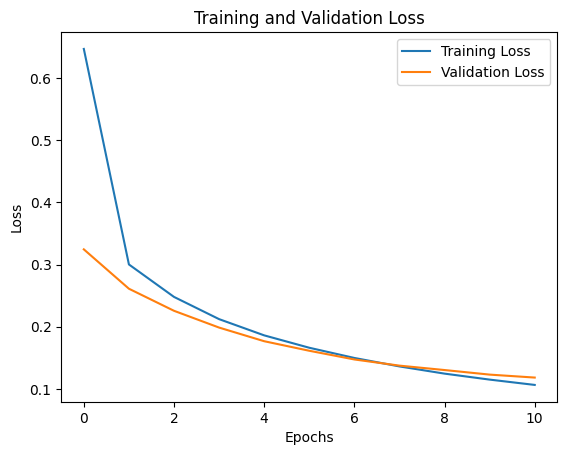

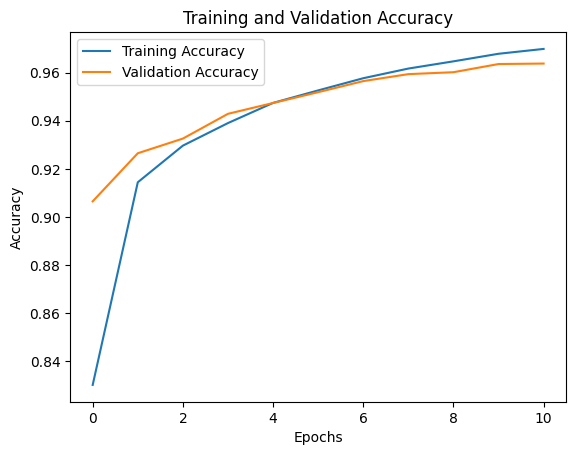

In [18]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


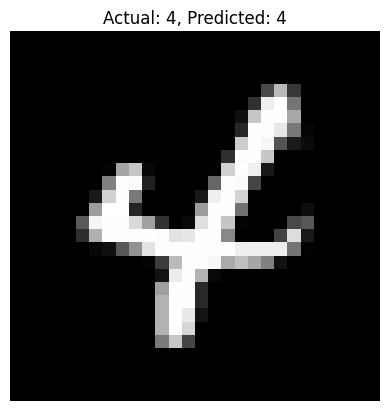

1/1 [==============================] - 0s 33ms/step


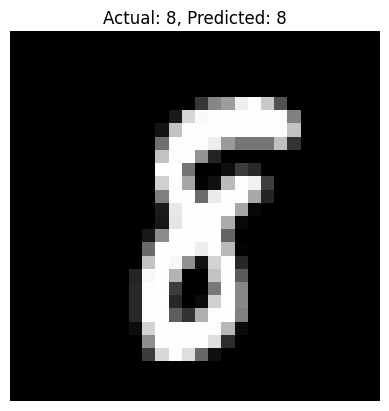

1/1 [==============================] - 0s 21ms/step


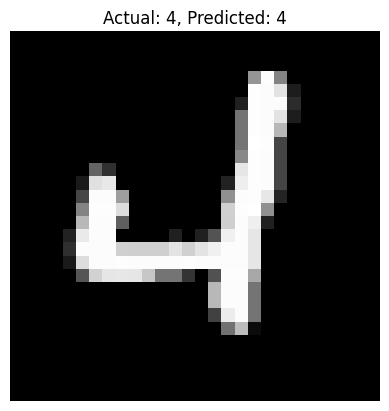

1/1 [==============================] - 0s 21ms/step


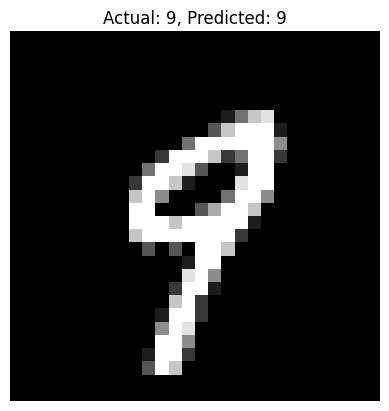

1/1 [==============================] - 0s 14ms/step


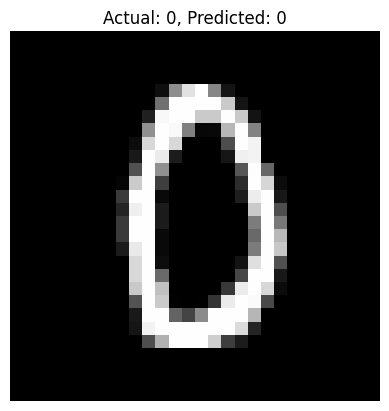

In [21]:
import numpy as np

# Select a few random images from the test set
num_images = 5  # Number of images to test
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)

# Plot the images and display predictions
for i, index in enumerate(random_indices):
    img = x_test[index]
    label = y_test[index]
    
    # Predict the class of the image
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(prediction)
    
    # Display the image and the prediction
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()